In [47]:
#Inicialmente foi importado o pacote que será utilizado ao longo do programa.

import pandas as pd
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt

In [32]:
#Em seguida, é importada a planilha com as informações referentes aos jogos do campeonato brasileiro

partidas = pd.read_excel('e:/Desktop/Python/ECaso2/jogos_br.xlsx')
partidas

,partida_id,status,id_liga,liga_nome,liga_pais,temporada,rodada,casa_id,casa_nome,casa_vence,visitante_id,visitante_nome,visitante_vence,gols_casa,gols_visitante
0,837991,Match Finished,71,Serie A,Brazil,2022,Regular Season - 1,1062,Atletico-MG,1.0,119,Internacional,0.0,2,0
1,837992,Match Finished,71,Serie A,Brazil,2022,Regular Season - 1,124,Fluminense,NaN,128,Santos,NaN,0,0
2,837993,Match Finished,71,Serie A,Brazil,2022,Regular Season - 1,126,Sao Paulo,1.0,134,Atletico Paranaense,0.0,4,0
3,837994,Match Finished,71,Serie A,Brazil,2022,Regular Season - 1,121,Palmeiras,0.0,129,Ceara,1.0,2,3
4,837995,Match Finished,71,Serie A,Brazil,2022,Regular Season - 1,120,Botafogo,0.0,131,Corinthians,1.0,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,838366,Match Finished,71,Serie A,Brazil,2022,Regular Season - 38,119,Internacional,1.0,121,Palmeiras,0.0,3,0
376,838367,Match Finished,71,Serie A,Brazil,2022,Regular Season - 38,129,Ceara,1.0,152,Juventude,0.0,4,1
377,838368,Match Finished,71,Serie A,Brazil,2022,Regular Season - 38,151,Goias,0.0,126,Sao Paulo,1.0,0,4
378,838369,Match Finished,71,Serie A,Brazil,2022,Regular Season - 38,1193,Cuiaba,1.0,147,Coritiba,0.0,2,1


A base de dados com as informacoes dos jogos foi extraida do site API-Football e salva em uma planilha excel.

A seguir, são realizados os comandos para importacao da planilha para este notebook, e tambem, são feitos alguns tratamentos nos campos da base a fim de facilitar a sua manipulação, que são eles:

- Foi criado um campo com o resultado da partida para o time da casa e o visitante, isto e, se venceram ou perderam. A base ja possuia um campo informando o resultado, porem os valores estavam apenas como falso ou verdadeiro, e ao ser importado para o notebook vem com os valores 0 ou 1, com isso, eles foram substituidos pelas letras D(Derrota) e V(Vitoria), com o objetivo de facilitar a visualizacao, alem de incluir a letra E para empate, pois nesta condicao o campo de resultado ficava em branco.

- Por fim, foram excluidas as colunas casa_vence e fora_vence devido aos tratamentos realizados conforme o item anterior.


In [33]:
partidas['result_casa']= partidas.casa_vence.replace({0.0:'D',1.0:'V'}).fillna('E')
partidas['result_visit']= partidas.visitante_vence.replace({0.0:'D',1.0:'V'}).fillna('E')
partidas.drop(columns=['casa_vence','visitante_vence'], inplace = True)


In [34]:
#Agora com os devidos tratamentos, podemos seguir com os respectivos cálculos para proseguimento da análise.
#Logo, são calculados o total de gols de cada partida bem como a diferença de gols também por partida.

partidas['dif_gols'] = abs(partidas['gols_casa']-partidas['gols_visitante'])
partidas['total_gols'] = partidas['gols_casa']+partidas['gols_visitante']
partidas.head()

,partida_id,status,id_liga,liga_nome,liga_pais,temporada,rodada,casa_id,casa_nome,visitante_id,visitante_nome,gols_casa,gols_visitante,result_casa,result_visit,dif_gols,total_gols
0,837991,Match Finished,71,Serie A,Brazil,2022,Regular Season - 1,1062,Atletico-MG,119,Internacional,2,0,V,D,2,2
1,837992,Match Finished,71,Serie A,Brazil,2022,Regular Season - 1,124,Fluminense,128,Santos,0,0,E,E,0,0
2,837993,Match Finished,71,Serie A,Brazil,2022,Regular Season - 1,126,Sao Paulo,134,Atletico Paranaense,4,0,V,D,4,4
3,837994,Match Finished,71,Serie A,Brazil,2022,Regular Season - 1,121,Palmeiras,129,Ceara,2,3,D,V,1,5
4,837995,Match Finished,71,Serie A,Brazil,2022,Regular Season - 1,120,Botafogo,131,Corinthians,1,3,D,V,2,4


In [46]:
#Levantamento da quantidade de jogos agrupada pela diferença de gols nos jogos

dif_gols = partidas.groupby('dif_gols')['partida_id'].count().sort_values(ascending = False)
dif_gols

dif_gols
1    171
0    108
2     58
3     29
4     12
5      1
6      1
Name: partida_id, dtype: int64

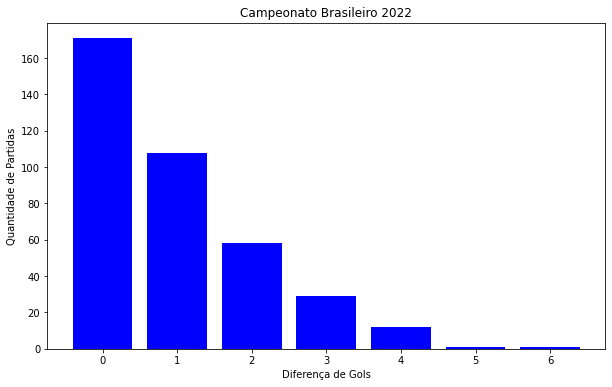

In [63]:

Gols = [0,1,2,3,4,5,6]

plt.figure(figsize=(10, 6))


plt.bar(Gols,dif_gols, color='b')

plt.xlabel("Diferença de Gols")
plt.ylabel("Quantidade de Partidas")
plt.title("Campeonato Brasileiro 2022")



plt.show()

In [39]:
#Calculo da proporção amostral de partidas vencidas por um gol de diferenca.

total_jgs = len(partidas.index)
vit_1gol = len(partidas['partida_id'].loc[(partidas.dif_gols==1)])

pr = vit_1gol/total_jgs
pr

0.45

In [41]:
#Intervalo de proporcao de jogos vencidos por diferenca de 1 gol

sm.stats.proportion_confint(total_jgs * pr, total_jgs, alpha = 0.01)

(0.384262545548444, 0.515737454451556)